<a href="https://colab.research.google.com/github/Sakshi-shaw/ACM_Winter_School_2023_Hands_on/blob/main/Lab2_Nerual_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

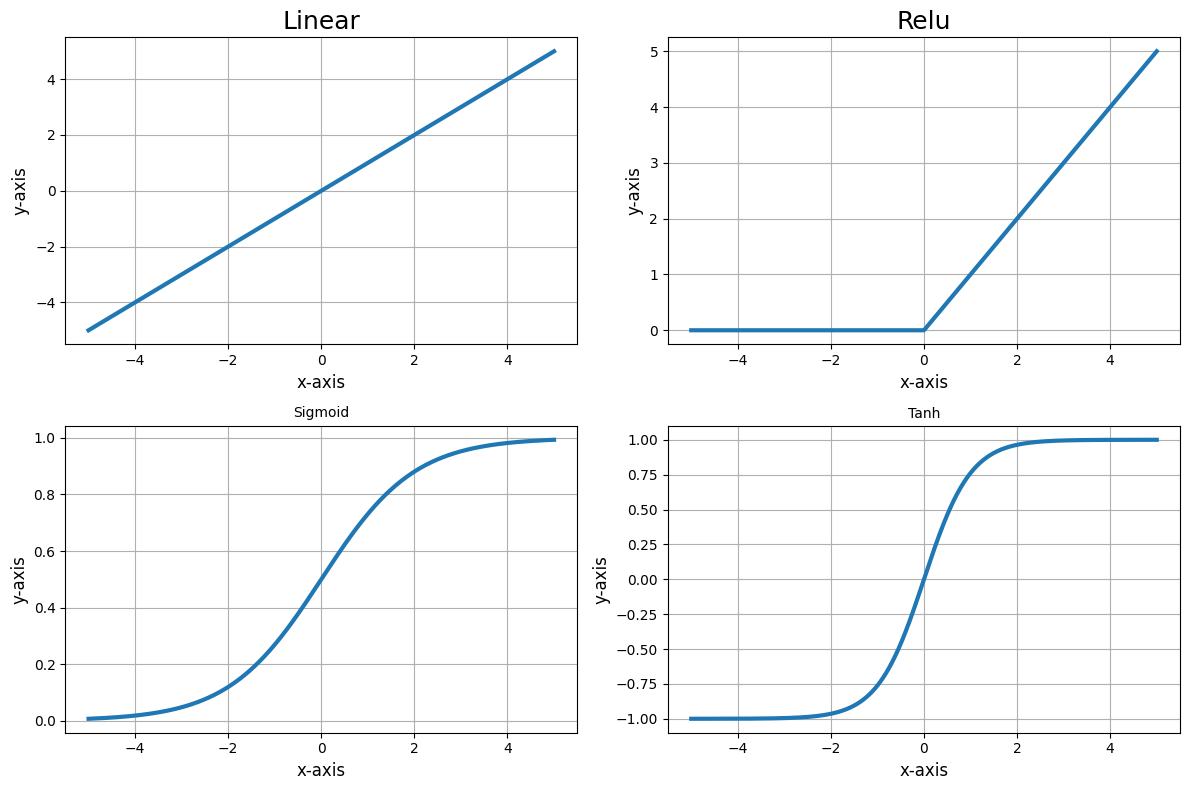

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def relu(x):
  return np.maximum(0,x)

def sigmoid(x):
  return 1 / (1+np.exp(-x))

def linear(x):
  return x;

def tanh(x):
  return np.tanh(x)

x= np.linspace(-5,5,1000)
fig, axes = plt.subplots(2,2,figsize=(12,8))

axes[0,0].plot(x,linear(x), linewidth=3)
axes[0,0].set_title('Linear',fontsize=18)
axes[0,0].grid()

axes[0,1].plot(x,relu(x), linewidth=3)
axes[0,1].set_title('Relu',fontsize=18)
axes[0,1].grid()

axes[1,0].plot(x,sigmoid(x), linewidth=3)
axes[1,0].set_title('Sigmoid',fontsize=10)
axes[1,0].grid()

axes[1,1].plot(x,tanh(x), linewidth=3)
axes[1,1].set_title('Tanh',fontsize=10)
axes[1,1].grid()

for ax in axes.flat:
  ax.set(xlabel='x-axis', ylabel='y-axis')
  ax.xaxis.label.set_size(12)
  ax.yaxis.label.set_size(12)

fig.tight_layout()
plt.show()

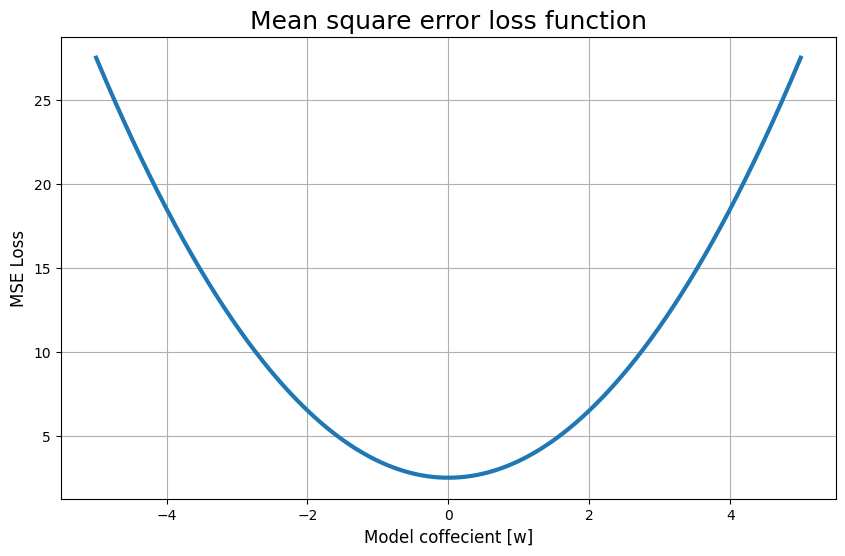

In [ ]:
#MSE loss function
import numpy as np
import matplotlib.pyplot as plt

def mse_loss(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2 )+2.5

y_true = 0
x = np.linspace(-5,5,1000)
mse = [mse_loss(y_true, y_pred) for y_pred in x]

plt.figure(figsize=(10,6))
plt.plot(x, mse,linewidth=3)
plt.title('Mean square error loss function', fontsize=18)
plt.xlabel('Model coffecient [w]',fontsize=12)
plt.ylabel('MSE Loss',fontsize=12)
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
#load the dataset
wine=load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['class'] = wine.target

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
#split the dataset into training and testing sets
X_train,X_test,y_train, y_test = train_test_split(data.drop('class',axis=1), data['class'], test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: ignored

In [ ]:
y_train[:10]

158    2
137    2
98     1
159    2
38     0
108    1
85     1
68     1
143    2
2      0
Name: class, dtype: int64

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)
y_train_one_hot[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#bulid ANN model
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.summary()
#13 features * 64 +bias(64) --- denes 1
#64 *32*+bias(32)--- denes 2
#32*13+bias(13) --- denes 3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


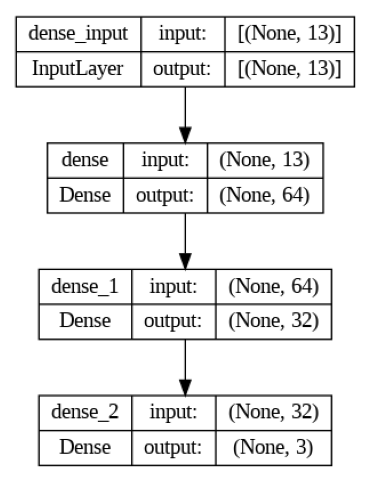

In [ ]:
#plot the ANN model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,6))
img = plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
 #train the model and save its history
h=model.fit(X_train, y_train_one_hot,epochs=100,batch_size=32, validation_split=0.1)


Epoch 1/100
4/4 [==============================] - 3s 155ms/step - loss: 1.0709 - accuracy: 0.4016 - val_loss: 1.1647 - val_accuracy: 0.4000
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.9336 - accuracy: 0.5748 - val_loss: 1.0424 - val_accuracy: 0.5333
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.8187 - accuracy: 0.7323 - val_loss: 0.9327 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.7159 - accuracy: 0.8268 - val_loss: 0.8415 - val_accuracy: 0.8000
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 0.6266 - accuracy: 0.8661 - val_loss: 0.7630 - val_accuracy: 0.8000
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.5487 - accuracy: 0.8898 - val_loss: 0.6917 - val_accuracy: 0.8667
Epoch 7/100
4/4 [==============================] - 0s 29ms/step - loss: 0.4782 - accuracy: 0.9134 - val_loss: 0.6286 - val_accuracy: 0.8667
Epoch 8/100
4/4 [==

In [ ]:
#Evalute the

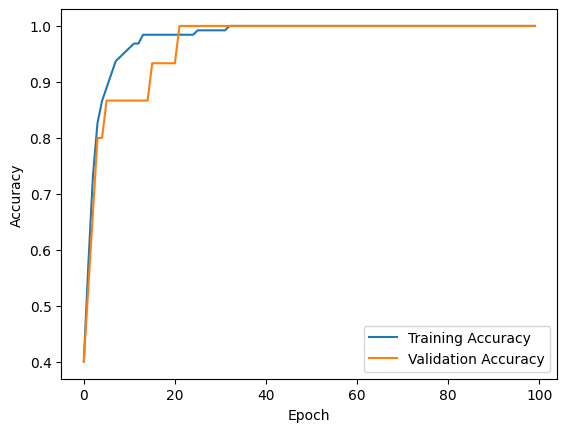

In [ ]:
#plot the model's training history
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Califonia dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
from sklearn.datasets import fetch_california_housing
 #load the califonia housing dataset
california_housing = fetch_california_housing()

#cfreat a dataFrame from the dataset
data =  pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['MEDV']=california_housing.target

print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
#split the dataset into training and testing sets
X_train, X_test,y_train,y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'],test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [ ]:
X_train[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [ ]:
#scaler the features
scaler =StandardScaler()
X_tarin = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [ ]:
#bulid ANN model
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


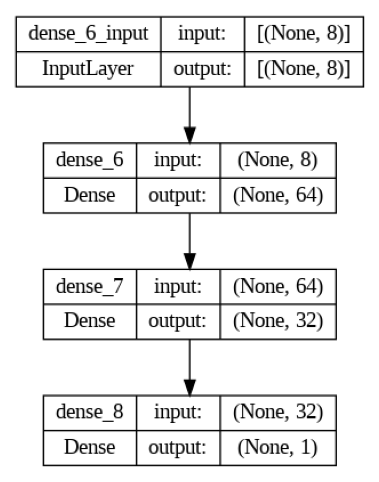

In [ ]:
#plot the ANN model
plot_model(model, to_file='model_reg.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,6))
img = plt.imread('model_reg.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

 #train the model and save its history
h=model.fit(X_train, y_train,epochs=100,batch_size=32, validation_split=0.1)


Epoch 1/100
465/465 [==============================] - 2s 2ms/step - loss: 36.4740 - val_loss: 1.3754
Epoch 2/100
465/465 [==============================] - 1s 2ms/step - loss: 2.1964 - val_loss: 0.9953
Epoch 3/100
465/465 [==============================] - 1s 2ms/step - loss: 1.9860 - val_loss: 0.8472
Epoch 4/100
465/465 [==============================] - 1s 3ms/step - loss: 4.7796 - val_loss: 1.2171
Epoch 5/100
465/465 [==============================] - 2s 3ms/step - loss: 16.8828 - val_loss: 0.8924
Epoch 6/100
465/465 [==============================] - 2s 4ms/step - loss: 5.5340 - val_loss: 0.7570
Epoch 7/100
465/465 [==============================] - 1s 2ms/step - loss: 2.0002 - val_loss: 0.6939
Epoch 8/100
465/465 [==============================] - 1s 2ms/step - loss: 6.6742 - val_loss: 0.7760
Epoch 9/100
465/465 [==============================] - 1s 2ms/step - loss: 2.2559 - val_loss: 0.7771
Epoch 10/100
465/465 [==============================] - 1s 2ms/step - loss: 4.8751 - val_

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print("test Loss; ", test_loss)

129/129 [==============================] - 0s 2ms/step - loss: 4.9637
test Loss;  4.963695049285889


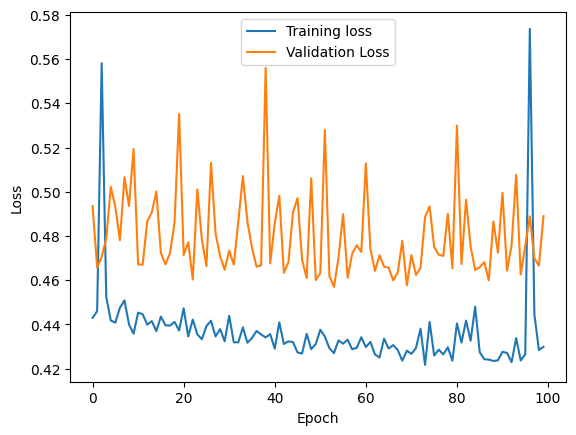

In [ ]:
#plot the model's training history
plt.plot(h.history['loss'], label='Training loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()